# The binary classification task

In [540]:
import pandas as pd
import numpy as np
np.random.seed(42)

In [541]:
df = pd.read_csv('../NSE_data_all_stocks_2022_jan_to_may (1).csv')
df

,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price
0,3-Jan-22,EGAD,Eaagads Ltd,10,15,13.5,13.8,13.5,13.5,-,-,"4,000",-
1,3-Jan-22,KUKZ,Kakuzi Plc,355,427,385,385,385,385,-,-,-,-
2,3-Jan-22,KAPC,Kapchorua Tea Kenya Plc,80,101,99.5,99.5,99.5,95.5,4,4.19%,100,-
3,3-Jan-22,LIMT,Limuru Tea Plc,260,360,320,320,320,320,-,-,-,-
4,3-Jan-22,SASN,Sasini Plc,16.75,22.6,18.7,18.7,18.7,18.7,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6727,31-May-22,MSC,Mumias Sugar Company Ltd,0.27,0.27,0.27,0.27,0.27,0.27,-,-,-,-
6728,31-May-22,UNGA,Unga Group Ltd,26.1,36.4,29,29,29,30,-1,3.33%,"2,100",-
6729,31-May-22,SCOM,Safaricom Plc,25.5,45.25,25.95,26.45,26,26.25,-0.25,0.95%,"20,079,900",-
6730,31-May-22,FAHR,Stanlib Fahari Income-REIT,5,7.48,5.5,5.6,5.56,5.58,-0.02,0.36%,"11,700",-


In [542]:
#Custom Data cleaner 
import random
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler   
nsc_scaler = StandardScaler()

class NSEDataPreProcessor(BaseEstimator, TransformerMixin):
    
    def __init__(self,company_code ,columns_to_type_cast, columns_to_scale, columns_to_return):
        self.company_code = company_code        
        self.to_type_cast= columns_to_type_cast 
        self.to_return= columns_to_return
        self.to_scale=columns_to_scale  #same as  columns_to_type_cast but has the company code.
        
        
    def __type_cast_and_scale_xyz_df(self, xyz_data_frame):
        for column_name in self.to_type_cast:
            xyz_data_frame[column_name] = pd.to_numeric(xyz_data_frame[column_name], errors='coerce')
        xyz_data_frame[self.to_scale] = nsc_scaler.fit_transform(xyz_data_frame[self.to_scale])
        
        
        return xyz_data_frame[self.to_return]
    
    def fit(self, X, y=None):
        return self      

    def transform(self, X):  
        xyz_company_data_frame = X[X['Code'] == self.company_code].reset_index(drop=True)
        type_converted_xyz_company_df = self.__type_cast_and_scale_xyz_df(
            xyz_company_data_frame       
        )        
        return type_converted_xyz_company_df
    
random_company_code = random.choice(df.Code)

#TPSE, UMME  giving the best results .
    
__nse_dat_preprocessor = NSEDataPreProcessor(
    company_code= random_company_code,
    columns_to_type_cast=['Previous','Day Price','Day High', 'Day Low', '12m High', '12m Low'],
    columns_to_scale=[ 'Day High', 'Day Low', '12m High', '12m Low'],
    columns_to_return=['Code','Day Price','Previous','Day High', 'Day Low', '12m High', '12m Low'], 
)
xyz_preprocessed_df = __nse_dat_preprocessor.fit_transform(
    df,    
)
display(xyz_preprocessed_df.head(2)) #Show the company being worked on .

preprocessed_df = xyz_preprocessed_df.drop(columns=['Code'])
preprocessed_df
    

,Code,Day Price,Previous,Day High,Day Low,12m High,12m Low
0,UCHM,0.23,0.24,2.772596,1.3781,5.551115e-17,-5.551115e-17
1,UCHM,0.22,0.23,1.620641,1.3781,5.551115e-17,-5.551115e-17


,Day Price,Previous,Day High,Day Low,12m High,12m Low
0,0.23,0.24,2.772596,1.378100,5.551115e-17,-5.551115e-17
1,0.22,0.23,1.620641,1.378100,5.551115e-17,-5.551115e-17
2,0.23,0.22,1.620641,0.718165,5.551115e-17,-5.551115e-17
3,0.23,0.23,1.044664,1.378100,5.551115e-17,-5.551115e-17
4,0.23,0.23,1.044664,1.378100,5.551115e-17,-5.551115e-17
...,...,...,...,...,...,...
97,0.19,0.20,-0.683267,-0.601705,5.551115e-17,-5.551115e-17
98,0.19,0.19,-0.683267,-0.601705,5.551115e-17,-5.551115e-17
99,0.18,0.19,-0.683267,-1.261641,5.551115e-17,-5.551115e-17
100,0.19,0.18,-1.259244,-1.261641,5.551115e-17,-5.551115e-17


In [543]:
x_features = ['Previous','Day High', 'Day Low', '12m High', '12m Low']
x_single_feature =  'Day Price'
y_classes = 'Day Price'

X = preprocessed_df[x_single_feature]
day_price_df = preprocessed_df[['Day Price','Previous' ]]
day_price_df


,Day Price,Previous
0,0.23,0.24
1,0.22,0.23
2,0.23,0.22
3,0.23,0.23
4,0.23,0.23
...,...,...
97,0.19,0.20
98,0.19,0.19
99,0.18,0.19
100,0.19,0.18


## Calculating Returns : The percentage change in stock price over the specified time period
### returns = ((currentDayPrice * previousDayPrice)*100)/previousDayPrice

In [544]:
import pandas_ta as ta

day_price_df = day_price_df.copy()

day_price_df.loc[:, 'EMA_LONG'] = ta.ema(day_price_df['Previous'], length=5)
day_price_df.loc[:, 'EMA_SHORT'] = ta.ema(day_price_df['Previous'], length=3)
day_price_df['Signal'] = 0  # Initializing the with a default value (e.g., 0 for no signal)


day_price_df.loc[day_price_df['EMA_SHORT'] > day_price_df['EMA_LONG'], 'Signal'] = 1

day_price_df.loc[day_price_df['EMA_SHORT'] < day_price_df['EMA_LONG'], 'Signal'] = -1


day_price_df = day_price_df.dropna()

day_price_df

,Day Price,Previous,EMA_LONG,EMA_SHORT,Signal
4,0.23,0.23,0.230000,0.230000,0
5,0.21,0.23,0.230000,0.230000,-1
6,0.21,0.21,0.223333,0.220000,-1
7,0.22,0.21,0.218889,0.215000,-1
8,0.23,0.22,0.219259,0.217500,-1
...,...,...,...,...,...
97,0.19,0.20,0.194791,0.195514,1
98,0.19,0.19,0.193194,0.192757,-1
99,0.18,0.19,0.192130,0.191379,-1
100,0.19,0.18,0.188086,0.185689,-1


In [545]:
X = day_price_df[['EMA_LONG', 'EMA_SHORT']]
y = day_price_df['Signal']
X

,EMA_LONG,EMA_SHORT
4,0.230000,0.230000
5,0.230000,0.230000
6,0.223333,0.220000
7,0.218889,0.215000
8,0.219259,0.217500
...,...,...
97,0.194791,0.195514
98,0.193194,0.192757
99,0.192130,0.191379
100,0.188086,0.185689


In [546]:
from sklearn.model_selection import train_test_split


from sklearn.model_selection import TimeSeriesSplit

X=X.values
y=y.values

tscv = TimeSeriesSplit(n_splits=10)

generalized_test_indices = []
for i, (train_indices, test_indices) in enumerate(tscv.split(X)):
    
    random_test_index = np.random.choice(test_indices)
    generalized_test_indices.append(random_test_index)


generalized_train_indices = np.setdiff1d(np.arange(len(X)), generalized_test_indices)

X_train, X_test = X[generalized_train_indices], X[generalized_test_indices]
y_train, y_test = y[generalized_train_indices], y[generalized_test_indices] 
    
X_train.shape, y_test.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(78, 2)

In [547]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

results=pd.DataFrame({
    "Actual": y_test,
    "Predicted":predictions
})

results



,Actual,Predicted
0,-1,-1
1,-1,1
2,-1,-1
3,1,1
4,1,1
5,1,1
6,-1,-1
7,-1,-1
8,1,1
9,0,-1


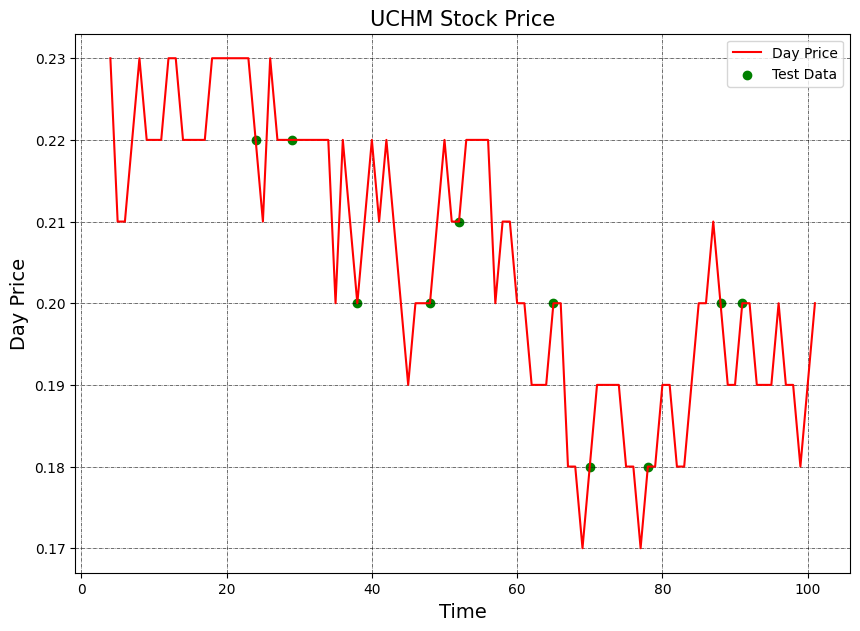

In [554]:
import matplotlib.pyplot as plt

# Assuming day_price_df is your DataFrame
day_price_df['Day Price'].plot(figsize=(10, 7), color=['red', 'green'])

# Scatter plot of test data points

test_data_prices = day_price_df['Day Price'][generalized_test_indices]
plt.scatter(generalized_test_indices, test_data_prices, color='green', marker='o', label='Test Data')

plt.title(random_company_code + " Stock Price", fontsize=15)
plt.ylabel('Day Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=.4)
plt.legend()  # Show legend with 'Test Data' label

# Show the plot
plt.show()


In [549]:
from sklearn.metrics import  accuracy_score,recall_score, precision_score, confusion_matrix


print("Accuracy:", accuracy_score(y_test, predictions, ))
print("Recall:", precision_score(y_test, predictions, average='micro'))
print("Precision:", recall_score(y_test, predictions, average= 'micro'))

conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
conf_matrix


Accuracy: 0.85
Recall: 0.85
Precision: 0.85
Confusion Matrix:


array([[12,  0,  2],
       [ 1,  0,  0],
       [ 0,  0,  5]])